In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn.datasets as data

# Image Classification using CNN

In [1]:
import tensorflow.compat.v2 

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten,Dense

**Displaying sample images**

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory

In [10]:
train_set=image_dataset_from_directory("Downloads/CNN_dataset/training_set",
                                                    validation_split=0.2,subset="training",seed=110,
                                                   image_size=(256,256),batch_size=32)  

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


In [11]:
class_name=train_set.class_names
class_name

['cats', 'dogs']

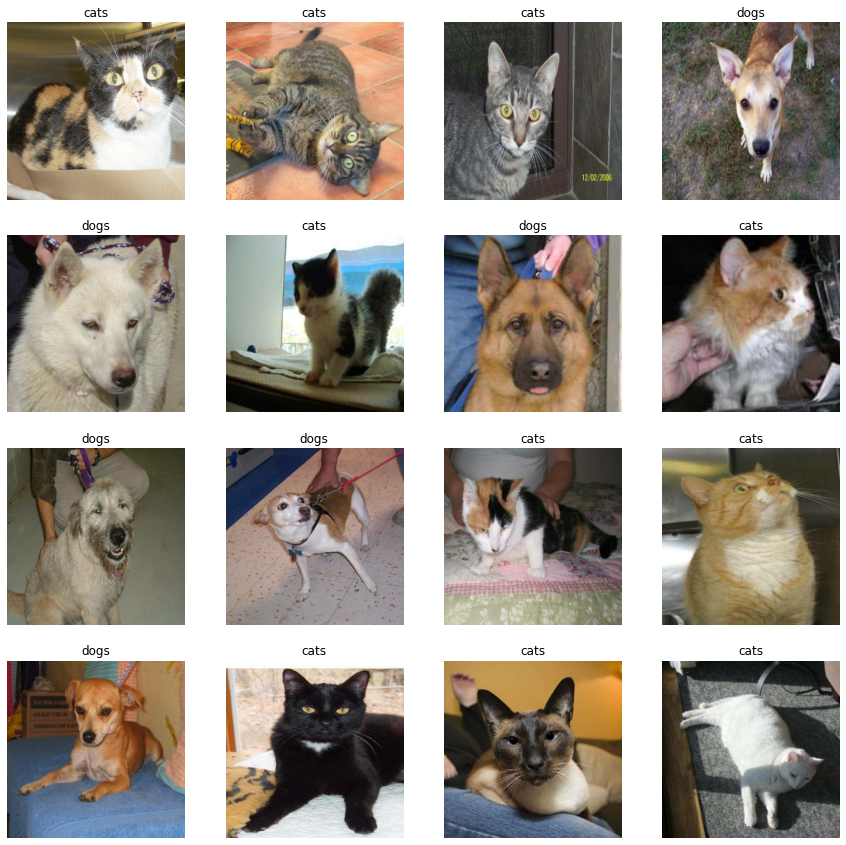

In [12]:
plt.figure(figsize=(15,15))
for image,labels in train_set.take(1):
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_name[labels[i]])
        plt.axis("off")

**Creating CNN Model**

In [36]:
cnn_classifier=Sequential()
## First Convolution layer with Pooling 
cnn_classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation="relu"))
cnn_classifier.add(MaxPooling2D(pool_size=(2,2)))

## Second Convolution layer with pooling
cnn_classifier.add(Conv2D(16,(3,3),activation="relu"))
cnn_classifier.add(MaxPooling2D(pool_size=(2,2)))

## Flattening
cnn_classifier.add(Flatten())

## Full connection (ANN layers)
cnn_classifier.add(Dense(128,activation="relu"))
cnn_classifier.add(Dense(1,activation="sigmoid"))

## compiling CNN
cnn_classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

**Data Augmentation**

In [37]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1/255)

training_set=train_datagen.flow_from_directory("Downloads/CNN_dataset/training_set",
                                              target_size=(64,64),batch_size=32,class_mode="binary")

test_set=test_datagen.flow_from_directory("Downloads/CNN_dataset/test_set",target_size=(64,64),
                                         batch_size=32,class_mode="binary")

cnn_classifier.fit(training_set,epochs=25,validation_data=test_set)
                            

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
250/250 [==============================] - 45s 176ms/step - loss: 0.6807 - accuracy: 0.5577 - val_loss: 0.6244 - val_accuracy: 0.6640
Epoch 2/25
250/250 [==============================] - 41s 165ms/step - loss: 0.6012 - accuracy: 0.6770 - val_loss: 0.5760 - val_accuracy: 0.7050
Epoch 3/25
250/250 [==============================] - 41s 165ms/step - loss: 0.5681 - accuracy: 0.7057 - val_loss: 0.5399 - val_accuracy: 0.7435
Epoch 4/25
250/250 [==============================] - 42s 168ms/step - loss: 0.5526 - accuracy: 0.7153 - val_loss: 0.5386 - val_accuracy: 0.7325
Epoch 5/25
250/250 [==============================] - 41s 165ms/step - loss: 0.5169 - accuracy: 0.7436 - val_loss: 0.5117 - val_accuracy: 0.7570
Epoch 6/25
250/250 [==============================] - 41s 166ms/step - loss: 0.5004 - accuracy: 0.7535 - val_loss: 0.5038 - val_accuracy: 0.7665
Epoch 7/25
250/250 [==========================

In [7]:
cnn_classifier.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001B8329CB820>>

**Way of Prediction 1**

In [40]:
test1_image=image.load_img("Downloads/CNN_dataset/single_prediction/cat_or_dog_1.jpg",
                          target_size=(64,64))
test1_image1=image.img_to_array(test1_image)
test1_image2=np.expand_dims(test1_image1,axis=0)
result1=cnn_classifier.predict(test1_image2)
result1

array([[1.]], dtype=float32)

In [50]:
test2_image=image.load_img("Downloads/CNN_dataset/single_prediction/cat.4038.jpg",
                          target_size=(64,64))
test2_image1=image.img_to_array(test2_image)
test2_image2=np.expand_dims(test2_image1,axis=0)
result2=cnn_classifier.predict(test2_image2)
result2

array([[0.]], dtype=float32)

In [47]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

**Way of Prediction 2**

In [43]:
def Image(Path,target_size):
    test_image=image.load_img(Path,target_size=target_size)
    test_image1=image.img_to_array(test_image)
    test_image2=np.expand_dims(test_image1,axis=0)
    result=cnn_classifier.predict(test_image2)
    return result

In [44]:
i=Image("Downloads/CNN_dataset/single_prediction/cat_or_dog_1.jpg",target_size=(64,64))
i

array([[1.]], dtype=float32)

In [51]:
i2=Image("Downloads/CNN_dataset/single_prediction/cat.4038.jpg",target_size=(64,64))
i2

array([[0.]], dtype=float32)